# Decision Trees and Random Forest 

## Objectives

1. Recall Definition and high level view of DT an RF models.
2. Explain the functions of DT and RF in ML models.
3. Use DT and RF models in an exercise.

## Table of Contents

1. Dataset: Calafornia Housing Prices
2. What is a Decision Tree Model
3. Scikit-Learn Library: The Decision tree 
4. What is a Random Forest Model
5. Scikit-Learn Library: The Random Forest

---

### Loading tools needed

**Note:** Not all packages have been loaded just yet!

In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

---

## 1. Dataset: Calafornia Housing Prices

This Data set should look fimiliar however here are the features being used:
 - **MedInc**:        median income in block
 - **HouseAge**:      median house age in block
 - **AveRooms**:      average number of rooms
 - **AveBedrms**:     average number of bedrooms
 - **Population**:    block population
 - **AveOccup**:      average house occupancy
 - **Latitude**:      house block latitude
 - **Longitude**:     house block longitude
 - **MedHouseVal**: median house value in block (target)

In [2]:
# Load the California Housing dataset
california_housing = fetch_california_housing(as_frame=True)

# Convert the dataset to a DataFrame
data = pd.DataFrame(california_housing.data)
data['MedHouseVal (target)'] = california_housing.target  # Add the target variable (median house value)

In [3]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal (target)
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Lets do some quick data engineering!

<img src = 'https://media2.giphy.com/media/qcy6cSzrtP7ybXvZvn/200.webp?cid=ecf05e478f150lqvhqbxz6l64azahvrxqgxh37z6j73fu72q&ep=v1_gifs_search&rid=200.webp&ct=g' width = 350 hieght = 350 alt="Your GIF" >

Data cleaning that happend:

#### Outliers

In [4]:
# Write some code to calculate the percentage of outliers in each column of our dataset
def percentage_outliers(column):
    threshold = 1.5
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    outliers = (column < Q1 - threshold * IQR) | (column > Q3 + threshold * IQR)
    return 100 * sum(outliers) / len(column)

# Calculate percentage of outliers per column
percentage_outliers_per_column = data.apply(percentage_outliers)

print(percentage_outliers_per_column)

MedInc                  3.299419
HouseAge                0.000000
AveRooms                2.475775
AveBedrms               6.899225
Population              5.794574
AveOccup                3.444767
Latitude                0.000000
Longitude               0.000000
MedHouseVal (target)    5.188953
dtype: float64


In [5]:
# Removing outliers lying outside of the 1.5 * IQR threshold
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
data_cleaned = data[~outliers]

#### Heat Map

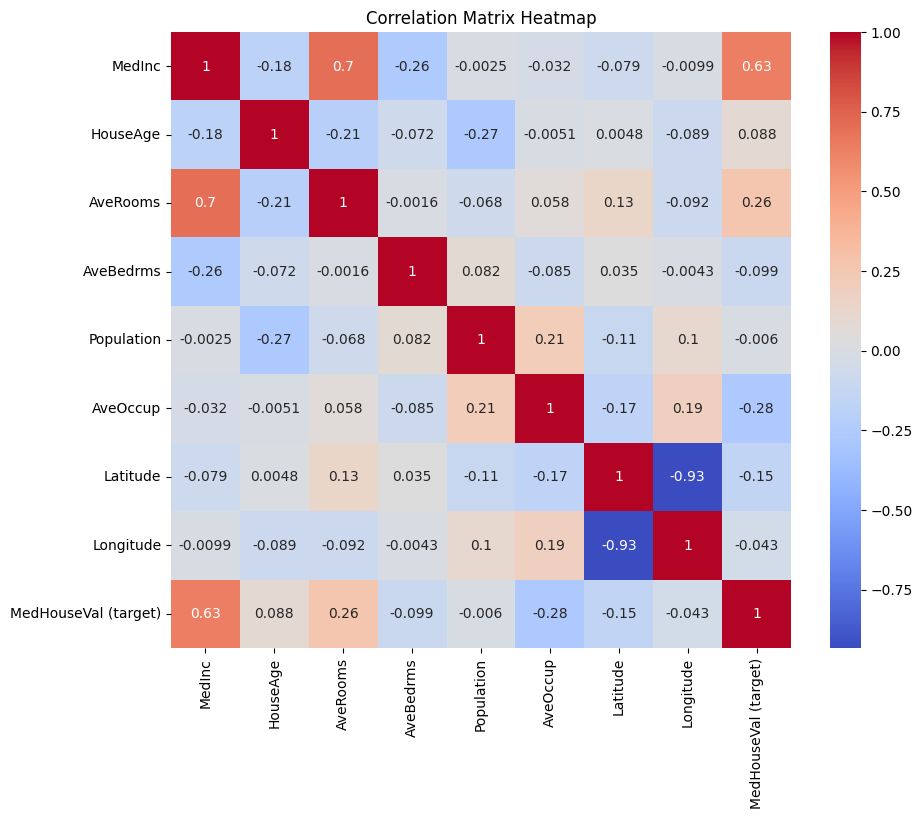

In [6]:
# Correlation matrix heatmap
correlation_matrix = data_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Spliting data into "X" and "Y"

In [7]:
X = data_cleaned[['MedInc']]
y = data_cleaned['MedHouseVal (target)']

#### Train/Test Split for Training Data

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---

## 2. What is a Decision Tree Model

A **Decision Tree** is like a flowchart used in machine learning. It helps with two main tasks: figuring out categories (like yes/no) or **estimating values (e.g., prices)**.

Imagine it as a tree:

At the top, you have the starting point (root).
Then, you have branches that represent choices based on different factors.
Further down, you reach the endpoint (leaves) where you get your answer.
In essence, decision trees are simple yet powerful tools for making decisions in a structured way, just like following a flowchart.

<img src = https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/df/de/Decision-Tree.png width =500 hieght =500>

A **Decision Tree** in machine learning determines the best **split** and sorting of data using a **technique called recursive binary splitting**. Here's how it works:

**Selecting the Best Split Feature**:

The algorithm evaluates each feature (attribute) to find the one that best separates the data into different classes or groups. It does this by calculating a splitting criterion, typically based on measures like **mean squared error (for regression)**.
The feature that results in the best split, as measured by the chosen criterion, is selected.

**Selecting the Best Split Point**:

For the chosen feature, the algorithm then determines the best split point or threshold value. This is done by trying various values of the selected feature and evaluating the splitting criterion for each value.
The split point that minimizes impurity or error is chosen as the best one.

**Recursive Process**:

Once the best feature and split point are determined, the dataset is divided into subsets based on these criteria.
The same process is then recursively applied to these subsets, creating child nodes, until a stopping condition is met (e.g., a maximum tree depth, a minimum number of samples per leaf, or impurity reaches a threshold).

**Stopping Criteria**:

The tree-building process stops when a predefined stopping criterion is met, preventing the tree from growing too large or overfitting the data.
The goal is to create splits that maximize the homogeneity (sameness) of the data within each resulting group. This process continues until the stopping conditions are satisfied, and the Decision Tree is complete.

---

## 3. Scikit-Learn Library: The Decision tree Model

As we may have noticed before the Scikit-Learn Library hosts a number of usefull models. One of these is the `DecisionTreeRegressor()`. This is the model that folows the concept that we have just discussed but applies this using python code. Note that the model comes with a number of paramators that help improve the performance of your model. You are definately encouraged to go check it out: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html. 

Here is a quick view of the syntax of the model in python and the general steps you would take to train the model and use it for predictions:
```python
# Step 1: Import the 'DecisionTreeRegressor' package

from sklearn.tree import DecisionTreeRegressor

# Step 2:  Create a Decision Tree regressor

reg = DecisionTreeRegressor()

# Step 3: Fit the regressor to your training data

reg.fit(X_train, y_train)

# Step 4: Make predictions

predictions = reg.predict(X_test)
```

## Lets try it out ourselves!

In [12]:
# Step 1: Import the 'DecisionTreeRegressor' package
from sklearn.tree import 

In [13]:
# Step 2:  Create a Decision Tree regressor
dt = 

In [14]:
# Step 3: Fit the regressor to your training data


DecisionTreeRegressor()

In [15]:
# Step 4: Make predictions
y_pred_dt = 

In [17]:
# Now to calculate the MSE
... = mean_squared_error(...)
print(f'Decision Tree score: {mse_dt}')

Decision Tree score: 0.9021450210711142


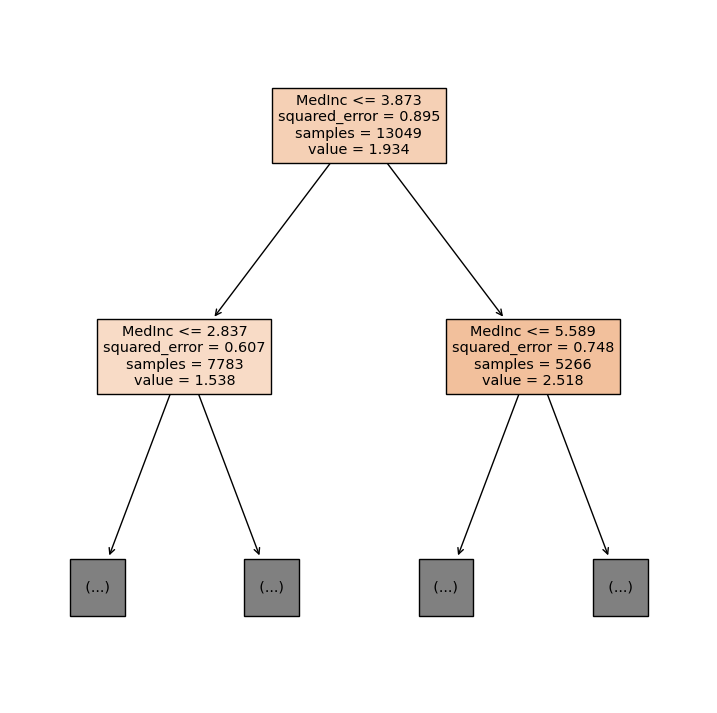

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(9,9))

# Assuming 'dt' is your Decision Tree model and 'feature_names' is a list of feature names
_ = plot_tree(dt, feature_names=['MedInc'], filled=True, max_depth=1)

---

## 4. What is a Random Forest Model

**Random Forest** combines the output of **multiple decision trees** to reach a single result.

Random Forest is like a teamwork approach in machine learning. Imagine you have a question, and instead of asking one person (a single decision tree), you ask a bunch of people (many decision trees). Each person gives their answer. Then, you all vote on the best answer. This combined answer is often more accurate and robust because it considers many perspectives.

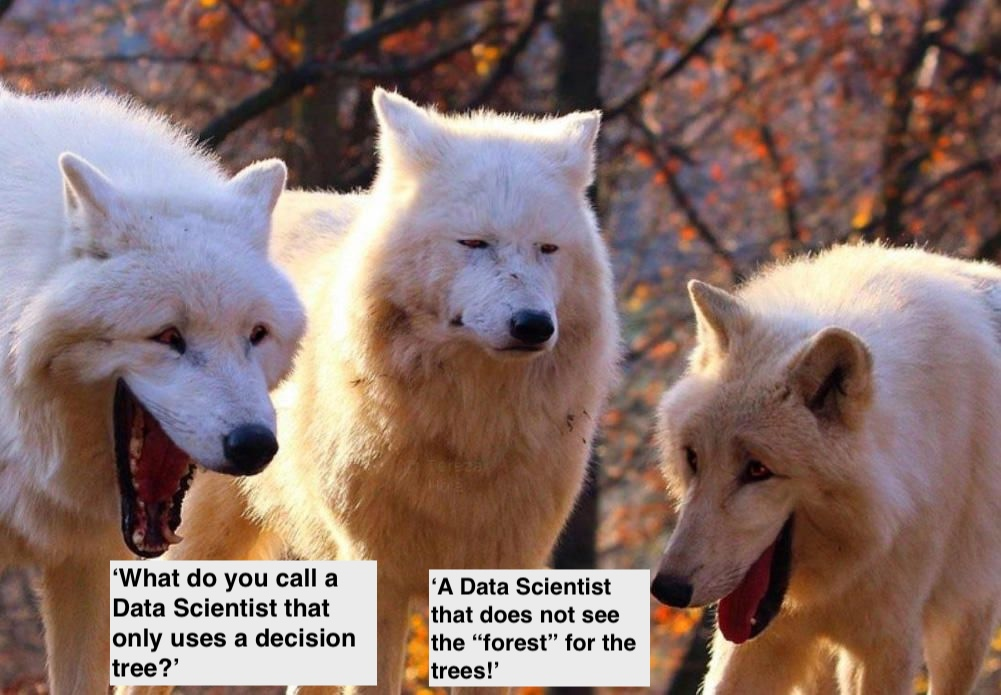

---

## 5. Scikit-Learn Library: The Random Forest

In scikit-learn, you can use the `RandomForestRegressor()` for regression tasks to create and work with Random Forest models. Here's a basic syntax for implementing Random Forest in scikit-learn:


```python
# Step 1: Import the 'DecisionTreeRegressor' package
from sklearn.ensemble import RandomForestRegressor

# Step 2: Create a Random Forest classifier
rgf = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators) as needed

# Step 3: Fit the classifier to your training data
rgf.fit(X_train, y_train)

# Step 4: Make predictions
predictions = rgf.predict(X_test)
```

## Lets try it out ourselves!

In [ ]:
# Step 1: Import the 'DecisionTreeRegressor' package
...

In [ ]:
# Step 2: Create a Random Forest classifier
# You can adjust the number of trees (n_estimators) as needed
rf = ... 

In [ ]:
# Step 3: Fit the classifier to your training data
...

In [ ]:
# Step 4: Make predictions
y_pred_rf = ...

In [ ]:
# Now to calculate the MSE
mse_rf = ...
print(f'Random forrest Wins! : {mse_rf}')

---

## References

* Decision Tree: https://www.ibm.com/topics/decision-trees#:~:text=data%20mining%20solutions-,Decision%20Trees,internal%20nodes%20and%20leaf%20nodes.
* Random Forest: https://www.ibm.com/topics/random-forest

---

## Objectives

1. Recall Definition and high level view of DT an RF models.
2. Explain the functions of DT and RF in ML models.
3. Use DT and RF models in an exercise.